<a href="https://colab.research.google.com/github/donna99f/Machine-Learning/blob/main/Regression_with_one_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Reading Data**

In [3]:
data=pd.read_csv('/content/ex1data1.txt',header=None, names=['Population','Profit'])

Data details

In [4]:
print(data.head(10))
print("______________________")
print(data.describe())
print("______________________")


   Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
5      8.3829  11.8860
6      7.4764   4.3483
7      8.5781  12.0000
8      6.4862   6.5987
9      5.0546   3.8166
______________________
       Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000
______________________


**Plot data**

<Axes: xlabel='Population', ylabel='Profit'>

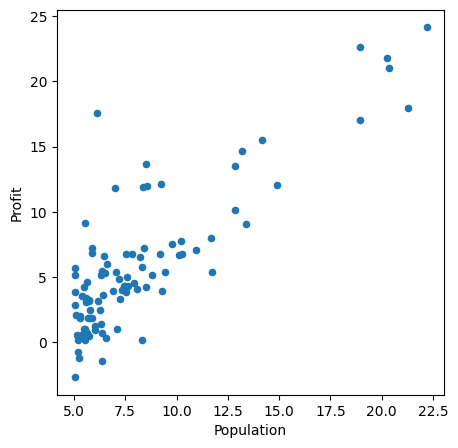

In [5]:
data.plot(kind='scatter',x='Population',y='Profit',figsize=(5,5))

**Inserting Ones column**

In [6]:
data.insert(0,'Ones',1)
print(data.head(10))

   Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233
5     1      8.3829  11.8860
6     1      7.4764   4.3483
7     1      8.5781  12.0000
8     1      6.4862   6.5987
9     1      5.0546   3.8166


**Separating data**

In [9]:
cols=data.shape[1]  #data_shape 97*3 so shape[1] is 3
X=data.iloc[ : , 0:cols-1] #Training Set
Y=data.iloc[ : , cols-1:cols] #Target Set
print("Training Set \n",X.head(10))
print("______________________")
print("Target Set \n",Y.head(10))


Training Set 
    Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598
5     1      8.3829
6     1      7.4764
7     1      8.5781
8     1      6.4862
9     1      5.0546
______________________
Target Set 
     Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233
5  11.8860
6   4.3483
7  12.0000
8   6.5987
9   3.8166


**Converting data to matrices**

In [18]:
X=np.matrix(X)
Y=np.matrix(Y)
T=np.array([0,0])
theta=np.matrix(T)
print('theta \n',theta)

theta 
 [[0 0]]


**Cost Function**

In [19]:
def computeCost(X,Y,theta):
  z=np.power(((X*theta.T)-Y),2)
  return np.sum(z) / (2* len(X))
  #cost=(1/2m)summation of(theta*X - Y )^2
  #m = len(X)
print('Cost (X,Y,theta) = ',computeCost(X,Y,theta))

Cost (X,Y,theta) =  32.072733877455676


**Gradient Descent Function**

In [20]:
def gradientDescent(X,Y,theta,alpha,iters):
  temp=np.matrix(np.zeros(theta.shape))
  parameters=int(theta.ravel().shape[1])
  cost=np.zeros(iters)

  for i in range (iters):
    error=(X*theta.T)-Y
    for j in range (parameters):
      term=np.multiply(error, X[:,j])
      temp[0,j]=theta[0,j] - ((alpha/len(X))* np.sum(term))

    theta=temp
    cost[i]=computeCost(X,Y,theta)
  return theta,cost


In [23]:
alpha=0.01 #Learning rate
iters=1000 #iterations
g,cost = gradientDescent(X,Y,theta,alpha,iters)

print('new theta = \n', g)
print('Cost \n', cost[265:275])
print('Cost \n', cost[988:999])
print('Final cost \n', computeCost(X,Y,g))

new theta = 
 [[-3.24140214  1.1272942 ]]
Cost 
 [5.02798147 5.02599676 5.0240192  5.02204877 5.02008543 5.01812917
 5.01617995 5.01423775 5.01230255 5.01037431]
Cost 
 [4.51753402 4.51738791 4.51724233 4.51709728 4.51695275 4.51680874
 4.51666525 4.51652227 4.51637981 4.51623786 4.51609643]
Final cost 
 4.515955503078914


**Getting the best fit line**

In [26]:
x=np.linspace(data.Population.min(),data.Population.max(), 100)
f= g[0,0] + (g[0,1]*x)  #linear eq with new theta

**Drawing the best fit line**

Text(0.5, 1.0, 'Predicted profit Vs. Population size')

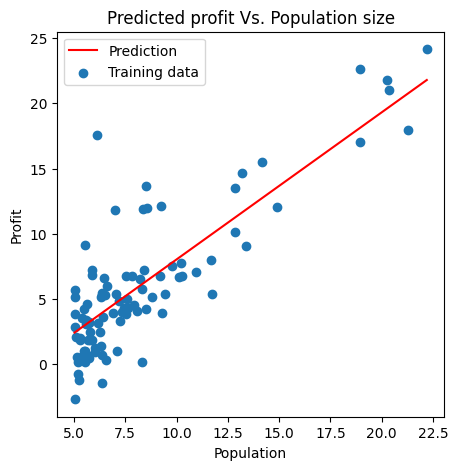

In [27]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.Population,data.Profit, label='Training data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted profit Vs. Population size')

**Drawing error graph**

Text(0.5, 1.0, 'Error Vs. Training Epoch')

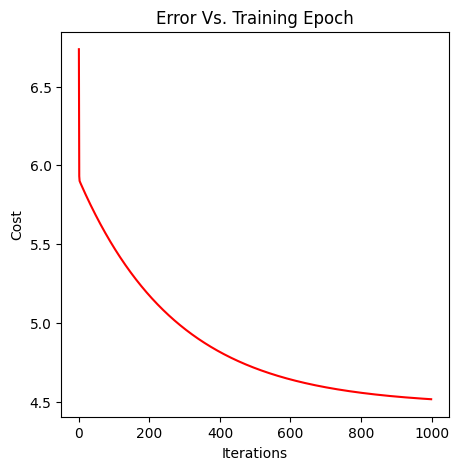

In [29]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters),cost,'r',)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error Vs. Training Epoch')